In [15]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("model_data.csv")

In [3]:
this_season = data[data['season']==2023].copy()

model_data = data[data['season']<2023].copy()

In [4]:
model_data

,week,away_team,home_team,away_score,home_score,result,spread_line,away_completions,away_attempts,away_passing_yards,...,home_receiving_2pt_conversions,home_racr,home_target_share,home_air_yards_share,home_wopr,home_special_teams_tds,home_fantasy_points,home_fantasy_points_ppr,home_games,season
272,1,BUF,LA,31.0,10.0,-21.0,-1.0,33.458824,52.462500,351.635294,...,0.142157,11.426606,1.264363,1.092152,2.661050,1.000000,92.607465,122.799482,130,2022
273,1,NO,ATL,27.0,26.0,-1.0,-6.0,38.696429,64.666667,438.017857,...,0.290909,8.352405,1.270944,1.580133,3.012509,0.000000,49.677191,73.465827,153,2022
274,1,CLE,CAR,26.0,24.0,-2.0,2.5,16.766667,29.166667,139.633333,...,0.213585,16.223743,1.818695,1.783046,3.976174,1.200000,100.500928,134.405830,205,2022
275,1,SF,CHI,10.0,19.0,9.0,-6.5,43.212500,67.608333,540.500000,...,0.142857,14.455691,1.924641,2.020103,4.301034,1.000000,128.708372,168.017782,199,2022
276,1,PIT,CIN,23.0,20.0,-3.0,7.5,18.700000,31.600000,147.100000,...,0.071429,16.183130,1.601140,1.774576,3.643913,0.000000,93.360834,125.613040,149,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,19,LAC,NE,28.0,41.0,13.0,4.0,33.000000,53.937500,388.187500,...,0.076923,17.178354,2.224770,2.340363,4.975410,0.000000,105.991225,149.614393,230,2018
1640,19,PHI,NO,14.0,20.0,6.0,8.5,52.527473,78.274725,475.252747,...,0.000000,29.227668,2.091045,2.079041,4.591895,1.062500,125.355813,171.057202,233,2018
1641,20,LA,NO,26.0,23.0,-3.0,3.0,24.800000,40.266667,301.933333,...,0.000000,29.227668,2.091045,2.079041,4.591895,1.062500,125.355813,171.057202,233,2018
1642,20,NE,KC,37.0,31.0,-6.0,3.0,36.362500,57.475000,414.762500,...,0.000000,14.121092,1.575170,1.780411,3.609043,0.066667,89.550687,122.781929,160,2018


In [5]:
features = [
    i for i in model_data.columns if i not in ['week','away_team','home_team','away_score','home_score','result','season',]
]
target = 'result'

In [6]:
Xtrain,Xtest,ytrain,ytest=train_test_split(model_data[features],model_data[target],test_size=.2,random_state=42,shuffle=True)

c:\Users\Jason\Desktop\git_control\pick-em\.venv\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


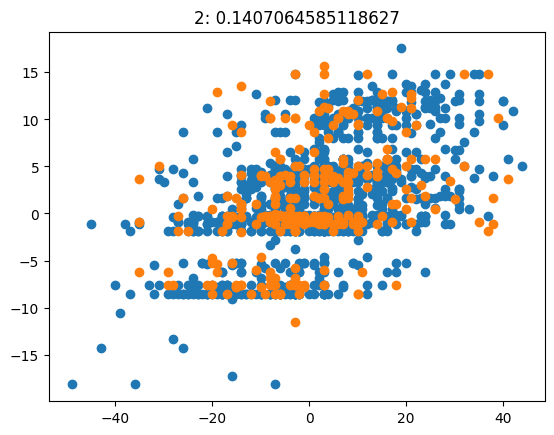

c:\Users\Jason\Desktop\git_control\pick-em\.venv\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


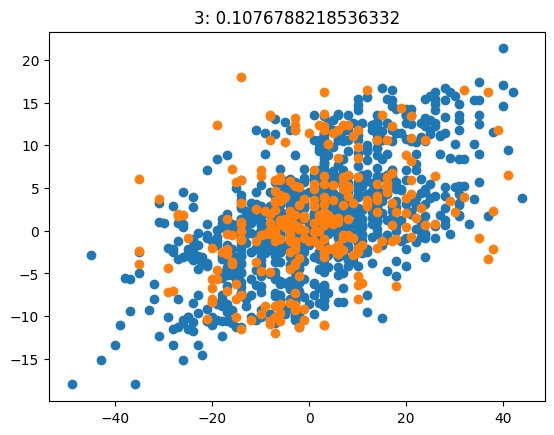

c:\Users\Jason\Desktop\git_control\pick-em\.venv\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


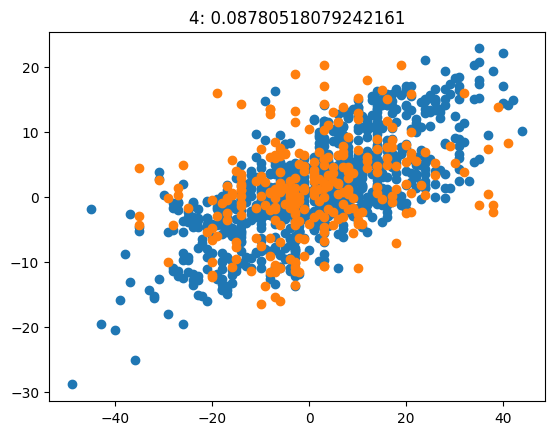

c:\Users\Jason\Desktop\git_control\pick-em\.venv\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


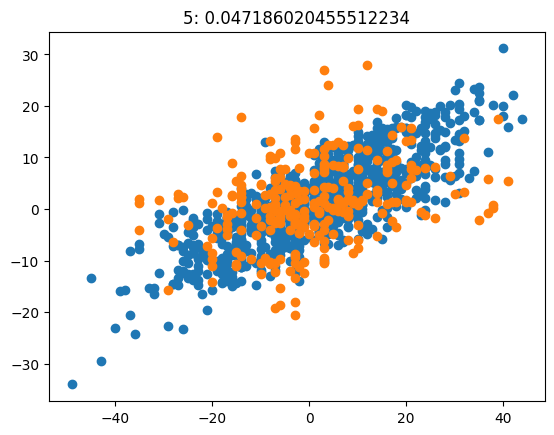

c:\Users\Jason\Desktop\git_control\pick-em\.venv\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


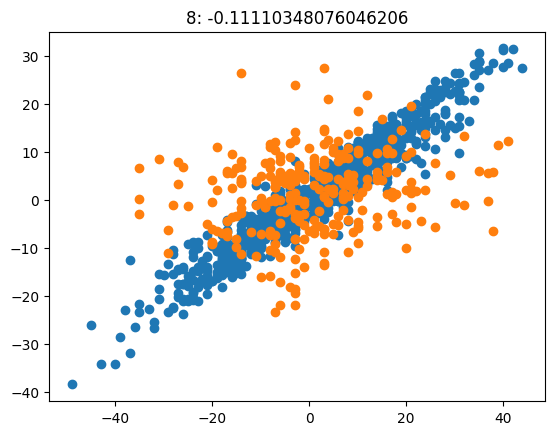

c:\Users\Jason\Desktop\git_control\pick-em\.venv\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


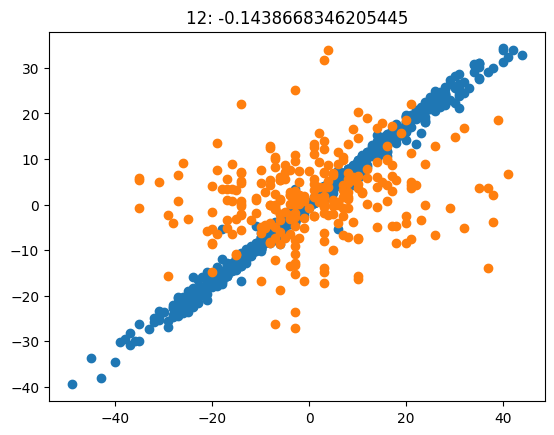

In [8]:
for d in [2,3,4,5,8,12]:
    model = Pipeline(steps=[
        ('scaler',MinMaxScaler()),
        ('learner',
         XGBRegressor(random_state=42,max_depth=d,n_estimators=8)
         #MLPRegressor(random_state=42,hidden_layer_sizes=(20,20),activation='relu',alpha=0,batch_size=1,solver='sgd',learning_rate_init=.0001,
         #             max_iter=200,learning_rate='constant',shuffle=True,verbose=True)
                                )
    ]).fit(Xtrain,ytrain)

    yfit = pd.Series(model.predict(Xtrain),Xtrain.index)
    ypred = pd.Series(model.predict(Xtest),Xtest.index)

    plt.scatter(ytrain,yfit)
    plt.scatter(ytest,ypred)
    plt.title(str(d) +": "+ str(r2_score(ytest,ypred)))
    plt.show()

Iteration 1, loss = 101.73350085
Iteration 2, loss = 101.58300801
Iteration 3, loss = 101.48640523
Iteration 4, loss = 101.42293226
Iteration 5, loss = 101.38363987
Iteration 6, loss = 101.35228349
Iteration 7, loss = 101.33778380
Iteration 8, loss = 101.32662325
Iteration 9, loss = 101.31830692
Iteration 10, loss = 101.31312624
Iteration 11, loss = 101.31374616
Iteration 12, loss = 101.31174959
Iteration 13, loss = 101.31037077
Iteration 14, loss = 101.30651865
Iteration 15, loss = 101.30668430
Iteration 16, loss = 101.31069738
Iteration 17, loss = 101.30626895
Iteration 18, loss = 101.30567529
Iteration 19, loss = 101.30296404
Iteration 20, loss = 101.30320207
Iteration 21, loss = 101.30185601
Iteration 22, loss = 101.30312724
Iteration 23, loss = 101.30333249
Iteration 24, loss = 101.30339489
Iteration 25, loss = 101.29776995
Iteration 26, loss = 101.29627779
Iteration 27, loss = 101.30285181
Iteration 28, loss = 101.30374694
Iteration 29, loss = 101.29898370
Iteration 30, loss = 10

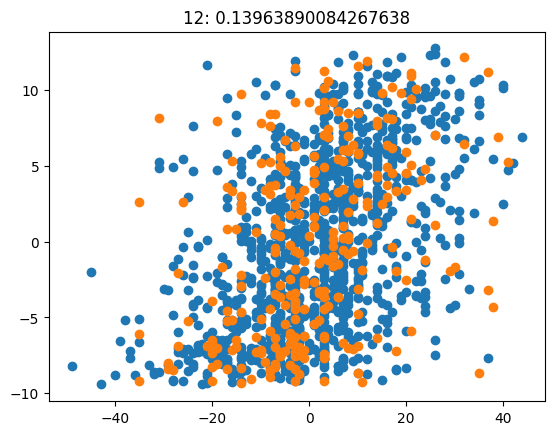

In [74]:
model = Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('learner',MLPRegressor(random_state=42,hidden_layer_sizes=(10,5),activation='logistic',
                            alpha=0,batch_size=1,solver='sgd',learning_rate_init=.00001,
                            tol=1e-5,
                            n_iter_no_change=10,
                      max_iter=2000,learning_rate='constant',shuffle=True,verbose=True))
]).fit(Xtrain,ytrain)

yfit = pd.Series(model.predict(Xtrain),Xtrain.index)
ypred = pd.Series(model.predict(Xtest),Xtest.index)

plt.scatter(ytrain,yfit)
plt.scatter(ytest,ypred)
plt.title(str(d) +": "+ str(r2_score(ytest,ypred)))
plt.show()

In [75]:
this_seasonX = this_season[features].copy()

In [76]:
this_season_prediction = pd.Series(model.predict(this_seasonX),this_seasonX.index)

In [77]:
this_season_prediction

0      3.644215
1      0.487222
2      9.317227
3     -4.919366
4     -6.994387
         ...   
267   -1.373966
268   -4.294659
269    5.922124
270   -5.518178
271   -0.117058
Length: 272, dtype: float64

In [78]:
this_season['PRED'] = this_season_prediction

In [79]:
this_season[this_season['week']==1][['away_team','home_team','spread_line','PRED']]

,away_team,home_team,spread_line,PRED
0,DET,KC,4.0,3.644215
1,CAR,ATL,3.5,0.487222
2,HOU,BAL,9.5,9.317227
3,CIN,CLE,-2.5,-4.919366
4,JAX,IND,-5.0,-6.994387
5,TB,MIN,5.5,3.411145
6,TEN,NO,3.0,1.878246
7,SF,PIT,-2.0,-5.999769
8,ARI,WAS,7.0,8.052221
9,GB,CHI,1.0,-2.942016


In [80]:
from joblib import dump

In [81]:
dump(model,"model.joblib")

['model.joblib']

In [ ]:
#https://github.com/nflverse/nflverse-data/releases?page=
#https://football.fantasysports.yahoo.com/pickem/14086/6
#https://github.com/nflverse/nfldata/blob/master/data/games.csv